### import modules

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re as re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### missing values

In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age']).mean()
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

### features engineering

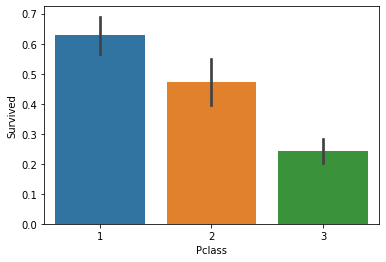

In [8]:
sns.barplot(x= 'Pclass', y= 'Survived', data= df_train);

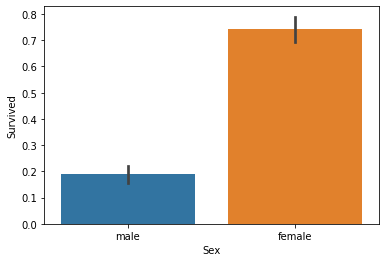

In [9]:
sns.barplot(x= 'Sex', y= 'Survived', data= df_train);

In [10]:
def get_title(name):
    find_title = re.search('([A-Z][a-z]+)\.', name)
    if find_title:
        return find_title.group(1)
    else:
        return ''

df_train['Title'] = df_train['Name'].apply(get_title)
df_train = df_train.drop('Name', axis = 1)
df_test['Title'] = df_test['Name'].apply(get_title)
df_test= df_test.drop('Name', axis = 1)

In [11]:
df_train[['Title','Sex']].value_counts()

Title     Sex   
Mr        male      517
Miss      female    182
Mrs       female    125
Master    male       40
Dr        male        6
Rev       male        6
Major     male        2
Col       male        2
Mlle      female      2
Countess  female      1
Don       male        1
Dr        female      1
Sir       male        1
Jonkheer  male        1
Lady      female      1
Mme       female      1
Ms        female      1
Capt      male        1
dtype: int64

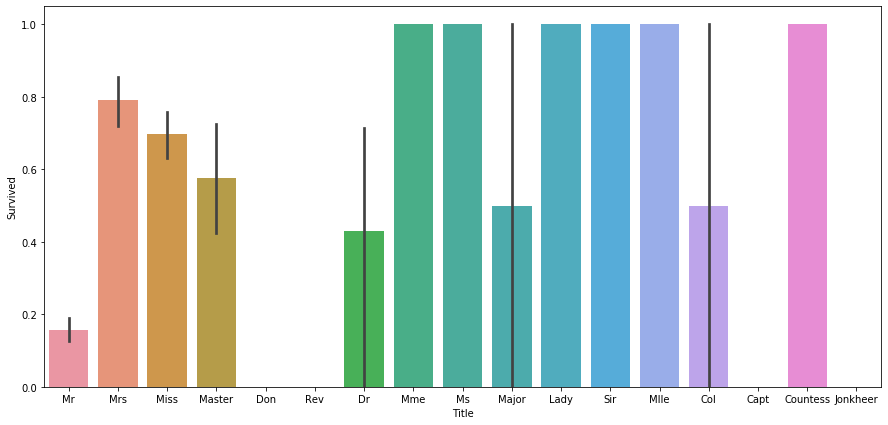

In [12]:
plt.figure(figsize= (15,7))
sns.barplot(x= 'Title', y= 'Survived', data= df_train);
plt.show()

In [13]:
df_test[['Title','Sex']].value_counts()

Title   Sex   
Mr      male      240
Miss    female     78
Mrs     female     72
Master  male       21
Rev     male        2
Col     male        2
Ms      female      1
Dr      male        1
Dona    female      1
dtype: int64

In [14]:
df_title = df_train[['Title', 'Survived']].groupby('Title').mean()

In [15]:
title_dict = {}
for i in range(len(list(df_title.index))):
    title_dict[list(df_title.index)[i]] = df_title.iloc[i,0]
title_dict['Dona']=0

df= [df_train, df_test]
for data in df:
    data['Title']=data['Title'].replace(title_dict)

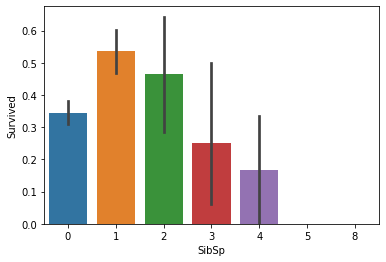

In [16]:
sns.barplot(x= 'SibSp', y= 'Survived', data= df_train);

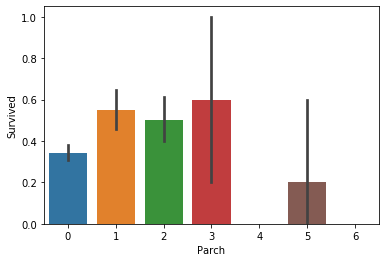

In [17]:
sns.barplot(x= 'Parch', y= 'Survived', data= df_train);

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


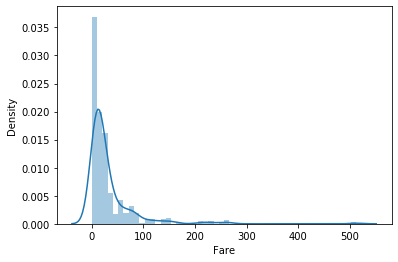

In [18]:
sns.distplot(df_train['Fare']);

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


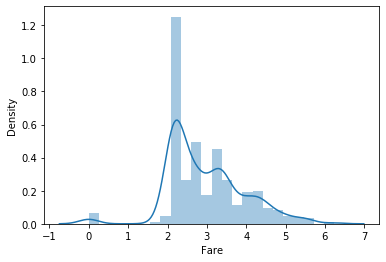

In [19]:
df_train['Fare'] = np.log(df_train['Fare']+1)
sns.distplot(df_train['Fare']);

#### corr matrix

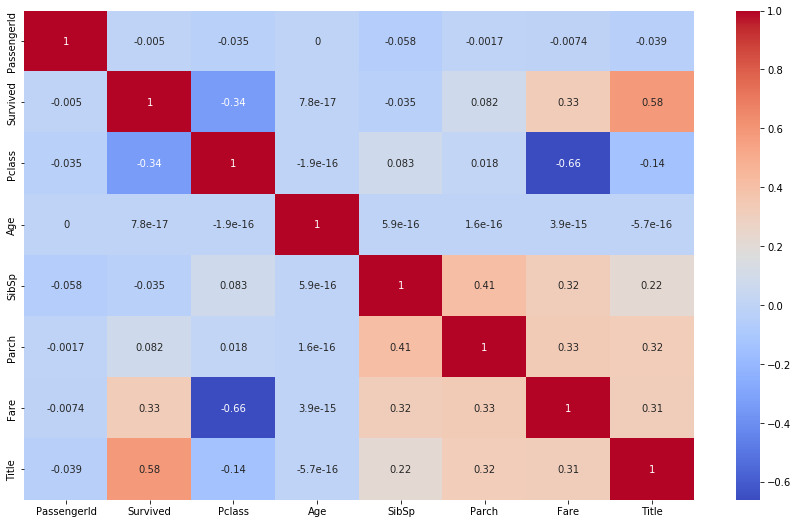

In [20]:
corr = df_train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot= True, cmap= 'coolwarm');

### Data Cleaning

In [21]:
df_train = df_train.drop(['PassengerId','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['PassengerId','Ticket','Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,29.699118,1,0,2.110213,S,0.156673
1,1,1,female,29.699118,1,0,4.280593,C,0.792000
2,1,3,female,29.699118,0,0,2.188856,S,0.697802
3,1,1,female,29.699118,1,0,3.990834,S,0.792000
4,0,3,male,29.699118,0,0,2.202765,S,0.156673


#### label encoding

In [22]:
df_train['Embarked'] = df_train['Embarked'].astype('category').cat.codes
df_test['Embarked'] = df_test['Embarked'].astype('category').cat.codes
df_train['Sex'] = df_train['Sex'].astype('category').cat.codes
df_test['Sex'] = df_test['Sex'].astype('category').cat.codes

In [23]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,29.699118,1,0,2.110213,2,0.156673
1,1,1,0,29.699118,1,0,4.280593,0,0.792000
2,1,3,0,29.699118,0,0,2.188856,2,0.697802
3,1,1,0,29.699118,1,0,3.990834,2,0.792000
4,0,3,1,29.699118,0,0,2.202765,2,0.156673


In [24]:
df_test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
413,3,1,NaN,0,0,8.0500,2,0.156673
414,1,0,39.0,0,0,108.9000,0,0.000000
415,3,1,38.5,0,0,7.2500,2,0.156673
416,3,1,NaN,0,0,8.0500,2,0.156673
417,3,1,NaN,1,1,22.3583,0,0.575000


In [25]:
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]
X_test  = df_test

In [26]:
X.shape

(891, 8)

In [27]:
X_test.shape

(418, 8)

In [28]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,29.699118,1,0,2.110213,2,0.156673
1,1,0,29.699118,1,0,4.280593,0,0.792000
2,3,0,29.699118,0,0,2.188856,2,0.697802
3,1,0,29.699118,1,0,3.990834,2,0.792000
4,3,1,29.699118,0,0,2.202765,2,0.156673


#### feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

#### Model Trainning 

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))

In [32]:
def classify2(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy:  0.8071748878923767
CV Score:  0.8125666938673026


In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy:  0.8161434977578476
CV Score:  0.8181909484652564


In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify2(model)

Accuracy:  0.8116591928251121
CV Score:  0.8114493754315486


In [36]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify2(model)

Accuracy:  0.820627802690583
CV Score:  0.8092084614901763


In [37]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify2(model)

Accuracy:  0.820627802690583
CV Score:  0.8204569706860838


In [38]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
classify2(model)

Accuracy:  0.8071748878923767
CV Score:  0.8361559224154165


## Complete Model Trainning with Full Data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

model_lgbm.score(x_test, y_test)

0.8071748878923767

In [40]:
lgbm_params = {"learning_rate" : [0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

from sklearn.model_selection import GridSearchCV

lgbm_cv = GridSearchCV(model_lgbm, lgbm_params, cv = 10, n_jobs = -1, verbose = 2)
lgbm_cv_model = lgbm_cv.fit(x_train, y_train)
lgbm_cv_model

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [41]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [45]:
model_lgbm = LGBMClassifier(learning_rate= 0.01, max_depth= 5, min_samples_split= 2, n_estimators= 1000)
model_lgbm.fit(x_train, y_train)

print(model_lgbm.score(x_test, y_test))

y_submission = model_lgbm.predict(X_test) 

0.8161434977578476


In [46]:
submission4 = pd.DataFrame({
        "PassengerId": pd.read_csv('test.csv')["PassengerId"],
        "Survived": y_submission
    })
submission4.to_csv('./submission4.csv', index=False)

In [44]:
# Score: 0.78468
# Score(optimize_params): 0.8161434977578476